In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
origdf = pd.read_csv("dataracing2023datacollection/training_data.csv")

In [31]:
subm = pd.read_csv("dataracing2023datacollection/data_submission_example.csv")

In [32]:
# Egyszerű-egyszerű megoldás

In [33]:
df = origdf.copy()

In [34]:
# DataPreparation

<AxesSubplot:>

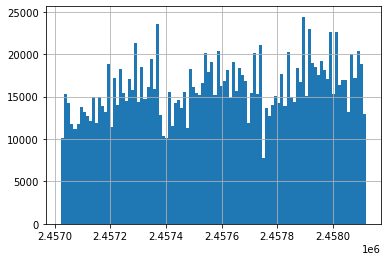

In [35]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].hist(bins=100)

<AxesSubplot:>

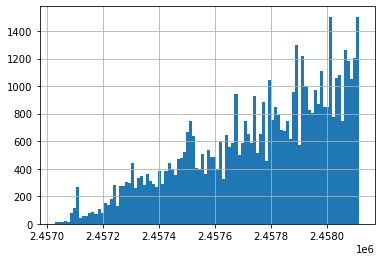

In [36]:
df['TARGET_EVENT_DAY'].hist(bins=100)

In [37]:
specidf = df[df['TARGET_EVENT']!='-'].copy()

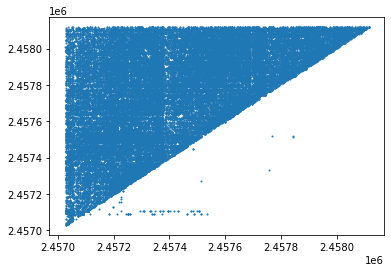

In [39]:
plt.scatter(specidf['CONTRACT_DATE_OF_LOAN_AGREEMENT'],specidf['TARGET_EVENT_DAY'],s=1)

In [55]:
bdf=specidf[specidf['CONTRACT_DATE_OF_LOAN_AGREEMENT']<2457029]
cdf=bdf.sort_values('TARGET_EVENT_DAY').head(1)
cdf

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
1424714,rrn-5qiM,+0NOwYK0,1d42bbf5,2.0,252761.0,31,2457028,NaN,479a2e13,NaN,...,74.83,100002.0,1232.0,98.0,98.0,97.0,B,2.0,E,2457035.0


In [57]:
specidf['MeddigBirta']=specidf['TARGET_EVENT_DAY']-specidf['CONTRACT_DATE_OF_LOAN_AGREEMENT']

<AxesSubplot:>

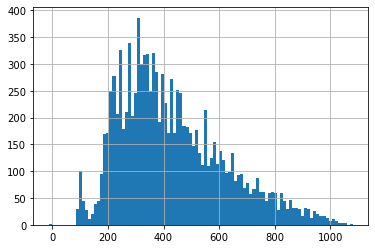

In [58]:
ddf=specidf[specidf['TARGET_EVENT']=='K']
ddf['MeddigBirta'].hist(bins=100)

In [59]:
eltolas = df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()


In [13]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max()-df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()

1094

364.6666666666667

In [60]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT']=df['CONTRACT_DATE_OF_LOAN_AGREEMENT']-eltolas

In [61]:
df['TARGET_EVENT_DAY']=df['TARGET_EVENT_DAY']-eltolas

<AxesSubplot:>

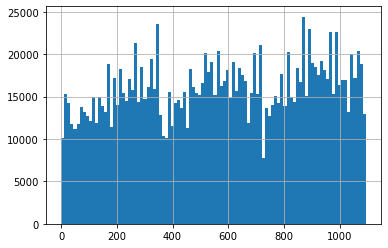

In [62]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].hist(bins=100)

<AxesSubplot:>

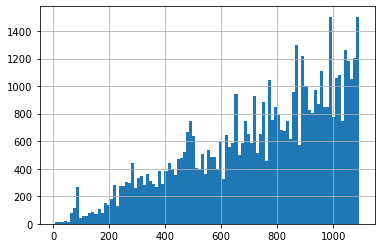

In [63]:
df['TARGET_EVENT_DAY'].hist(bins=100)

# ModeA terv:
- Első 365 nap adatából készítek tanító adathalmazt célváltozóval - R1 adathalmaz
- Az utolsó 365 nap adatából ugyanezt, de ugye ott nem lesz értelmes célválozó - R2 adathalmaz
- Modellt építek R1-en, optimalizálom, javítgatom, majd alkalmazom a beküldőn R2 adathalmazon

In [64]:
def datagen_modeA(df,startnap, endnap):
    pass

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

In [68]:
def datagen_modeA(origdf,startnap, endnap):
    df2 = origdf[ origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[ df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    
    cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    feltetel=(df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+365)
    df['target']=0
    df.loc[feltetel,'target']=1
    
    stat = df.groupby("BORROWER_ID",as_index=False).agg({'target':'max'})
    cust_df=cust_df.merge(stat,on='BORROWER_ID',how='left')
    cust_df['target']=cust_df['target'].fillna(0)  
    return cust_df

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

In [70]:
R1['target'].mean()

0.02649752186388786

In [71]:
R2['target'].mean()

0.0